<h2 style="align: left; float: left;">Final Project in Data bases - Hotel reviews</h2>

<h3 style="align: left; float: left;">Improts</h3>

In [1]:
import pandas as pd
import numpy as np
!pip install wordcloud
#for pre Processing
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
import re

#for Graphs
import matplotlib 
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
from wordcloud import WordCloud 

#for Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#for Feature Extraction
# !pip install gensim
import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


--2021-01-21 17:21:55--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.12.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.12.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  32.2MB/s    in 48s     

2021-01-21 17:22:44 (32.9 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



<h3 style="align: left; float: left;">Data Understanding</h3>


Displays the data:


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy



describe the features:


,count,unique,top,freq
User_ID,38932,38932,id32040,1
Description,38932,38932,"Only stayed - night but the room was clean, be...",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521



Distribution of reviews:


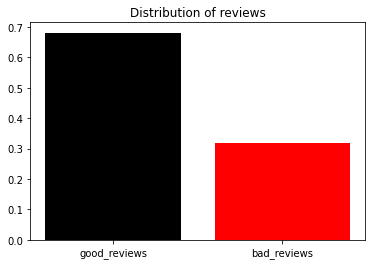

Check if there are null values:


User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

Most used words in reviews:


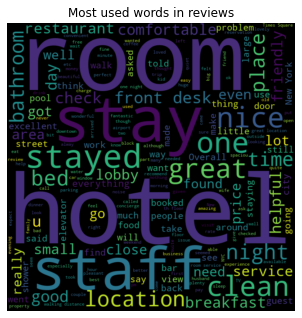

In [2]:
# read data
reviews_data = pd.read_csv('../input/hotelreviews/hotel-reviews.csv')

#Check if there are any missing values
print()
print("Displays the data:")
display(reviews_data)
print()
print("describe the features:")
display(reviews_data.describe().transpose())
print()
good_reviews = len([x for x, y in zip(reviews_data['Description'], reviews_data['Is_Response']) if y == 'happy'])/len(reviews_data)
bad_reviews = len([x for x, y in zip(reviews_data['Description'], reviews_data['Is_Response']) if y == 'not happy'])/len(reviews_data)
reviews = ['good_reviews','bad_reviews']
len_reviews = [good_reviews,bad_reviews]

#creating plot
plt.bar(reviews, len_reviews, color=['black', 'red'])
plt.xticks(reviews, reviews)
plt.title("Distribution of reviews",color='black', fontsize=12)
print("Distribution of reviews:")
plt.show()
print("Check if there are null values:")
display(reviews_data.isna().sum())

#The most common words
print("Most used words in reviews:")
wordcloud = WordCloud(width = 800, height = 800,background_color ='black',min_font_size = 10).generate(" ".join(reviews_data['Description'].values))
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most used words in reviews",fontsize=12)
plt.show()

<h3 style="align: left; float: left;">Data Preparation</h3>

Displays a graph showing the relationship between Device_Used variable and the target variable:


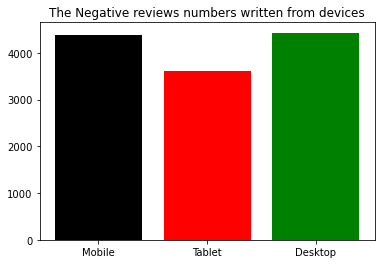

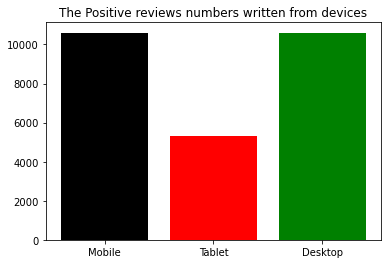


Check that reduction the number of reviews(to 20,000) does not change the ratio of negative reviews and positive reviews:
Good reviews before reducing : 68.12133977190999%
Bad reviews before reducing : 31.878660228090006%
Good reviews after reducing: 68.16%
Bad reviews after reducing : 31.840000000000003%
Displays the data after pre processing:


,Description,Is_Response
0,room kind clean strong smell dog generally ave...,0
1,stayed crown plaza april april staff friendly ...,0
2,booked hotel hotwire lowest price could find g...,0
3,stayed husband son way alaska cruise loved hot...,1
4,girlfriend stayed celebrate th birthday planne...,0
...,...,...
19995,looking relatively reasonably priced hotel chr...,0
19996,hotel lived brand upon entering hotel greated ...,1
19997,wife booked empire hotel three night commencin...,0
19998,third stay suite remembered heart everything c...,1


In [3]:
# Converting the targer variable to binary variable
reviews_data["Is_Response"] = reviews_data["Is_Response"].apply(lambda x: 0 if x == "not happy" else 1)

#Converting Device_Used to dummy variable
reviews_data = pd.get_dummies(reviews_data,columns=['Device_Used'])
reviews_data = reviews_data[['Description', 'Device_Used_Mobile','Device_Used_Tablet', 'Device_Used_Desktop','Is_Response']].copy()

#Check whether there is a relationship between the Device_Used variable and the target variable
def Checkin_relationship_variables(Response):
    reviews_data_response = reviews_data[reviews_data['Is_Response'] == Response] 
    mobile = (len(reviews_data_response[reviews_data_response['Device_Used_Mobile'] == 1]))
    tablet = (len(reviews_data_response[reviews_data_response['Device_Used_Tablet'] == 1]))
    desktop = (len(reviews_data_response[reviews_data_response['Device_Used_Desktop'] == 1]))
    name_device = ['Mobile','Tablet','Desktop']
    len_device = [mobile,tablet,desktop]
    #creating plot
    plt.bar(name_device, len_device, color=['black', 'red', 'green'])
    plt.xticks(name_device, name_device)
    if Response==0:
        res = "Negative reviews"
    else:
        res = "Positive reviews" 

    plt.title(f"The {res} numbers written from devices",color='black', fontsize=12)
    plt.show()
print("Displays a graph showing the relationship between Device_Used variable and the target variable:")        
Checkin_relationship_variables(0)
Checkin_relationship_variables(1)
print()

#reducing the data
print("Check that reduction the number of reviews(to 20,000) does not change the ratio of negative reviews and positive reviews:")
reviews_data = reviews_data[['Description', 'Is_Response']].copy()
print(f"Good reviews before reducing : {len([x for x, y in zip(reviews_data['Description'], reviews_data['Is_Response']) if y == 1])/len(reviews_data)*100}%")
print(f"Bad reviews before reducing : {len([x for x, y in zip(reviews_data['Description'], reviews_data['Is_Response']) if y == 0])/len(reviews_data)*100}%")
reviews_data = reviews_data.iloc[0:20000]
print(f"Good reviews after reducing: {len([x for x, y in zip(reviews_data['Description'], reviews_data['Is_Response']) if y == 1])/len(reviews_data)*100}%")
print(f"Bad reviews after reducing : {len([x for x, y in zip(reviews_data['Description'], reviews_data['Is_Response']) if y == 0])/len(reviews_data)*100}%")

#pre Processing
def pre_processing(review):
    stop = set(stopwords.words('english'))
    lemma = WordNetLemmatizer()
    
    text = re.sub(r'[^\w\s]','',review, re.UNICODE)
    text = " ".join([i for i in text.lower().split() if i not in stop])
    text = " ".join(lemma.lemmatize(word) for word in text.split())
    text = " ".join(word for word in text.split() if len(word) > 1 and not word.isdigit())
    return text

# Sending each review to preProcessing                      
reviews_data['Description'] = reviews_data['Description'] .apply(lambda review: pre_processing(review))

print("Displays the data after pre processing:")
display(reviews_data)

<h4 style="align: left; float: left;">Adding new features</h4>


Distribution of scores given by vader lexicon


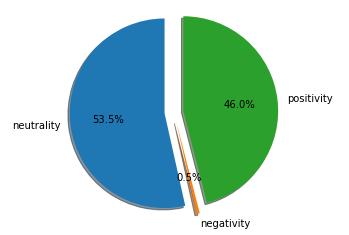


Displays the data after adding new features:


,Description,Is_Response,compound,neg,neu,pos,Length_review,weekend_days,food_catagory,service_catagory,pool_catagory,room_catagory,price_catagory,clean_catagory
0,room kind clean strong smell dog generally ave...,0,0.9501,0.000,0.473,0.527,0.022587,0,0,0,0,0,0,0
1,stayed crown plaza april april staff friendly ...,0,0.8718,0.038,0.834,0.128,0.101643,0,0,0,0,0,1,0
2,booked hotel hotwire lowest price could find g...,0,0.9107,0.079,0.755,0.166,0.123203,0,0,0,0,1,0,0
3,stayed husband son way alaska cruise loved hot...,1,0.9910,0.000,0.502,0.498,0.052361,0,0,0,0,0,0,0
4,girlfriend stayed celebrate th birthday planne...,0,0.9593,0.040,0.786,0.174,0.142710,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,looking relatively reasonably priced hotel chr...,0,-0.5930,0.127,0.759,0.114,0.189938,0,0,0,0,1,1,0
19996,hotel lived brand upon entering hotel greated ...,1,0.9833,0.000,0.477,0.523,0.043121,0,0,0,0,1,0,0
19997,wife booked empire hotel three night commencin...,0,0.7734,0.110,0.733,0.157,0.120123,0,0,0,0,0,0,0
19998,third stay suite remembered heart everything c...,1,0.7184,0.000,0.625,0.375,0.012320,0,0,0,0,0,0,0



The accuracy of the model with the new features is 0.7914


In [4]:
# Using vader lexicon to create sentiment information about the reviews
sid = SentimentIntensityAnalyzer()
reviews_data_SentimentIntensityAnalyzer = reviews_data.copy()

reviews_data_SentimentIntensityAnalyzer['compound'] = [sid.polarity_scores(x)['compound'] for x in reviews_data_SentimentIntensityAnalyzer['Description']]
reviews_data_SentimentIntensityAnalyzer['neg'] = [sid.polarity_scores(x)['neg'] for x in reviews_data_SentimentIntensityAnalyzer['Description']]
reviews_data_SentimentIntensityAnalyzer['neu'] = [sid.polarity_scores(x)['neu'] for x in reviews_data_SentimentIntensityAnalyzer['Description']]
reviews_data_SentimentIntensityAnalyzer['pos'] = [sid.polarity_scores(x)['pos'] for x in reviews_data_SentimentIntensityAnalyzer['Description']]

#Create diagram for the new information about the reviews
labels_pres = {'neutrality':0,'negativity':0,'positivity':0}
labels = 'neutrality','negativity' , 'positivity'
for i in range(len(reviews_data_SentimentIntensityAnalyzer)):
    if reviews_data_SentimentIntensityAnalyzer.at[i, "neg"]>=0.30:
        labels_pres['negativity'] = labels_pres['negativity']+1
    elif reviews_data_SentimentIntensityAnalyzer.at[i, "pos"]>=0.30:
        labels_pres['positivity'] = labels_pres['positivity']+1
    else:
        labels_pres['neutrality'] = labels_pres['neutrality']+1      
sizes = [labels_pres['neutrality'],labels_pres['negativity'],labels_pres['positivity']]
explode = (0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
print()
print("Distribution of scores given by vader lexicon")
plt.show()
print()
#adding new features
longest_review = max(x for x in reviews_data['Description'].str.count(' ').add(1))
reviews_data_SentimentIntensityAnalyzer['Length_review'] = [(x/longest_review) for x in reviews_data_SentimentIntensityAnalyzer['Description'].str.count(' ').add(1)]

weekend_day = ['thursday', 'friday' 'saturday', 'sunday', 'weekend']
reviews_data_SentimentIntensityAnalyzer['weekend_days'] = 0
for i, row in reviews_data_SentimentIntensityAnalyzer.iterrows():
    tmp_row = row['Description']
    row_with_split = tmp_row.split(" ")
    for word in row_with_split:
        if word in weekend_day:
            reviews_data_SentimentIntensityAnalyzer.at[i, "weekend_days"] = 1
            break
#Load the dictionary
filename = '/root/input/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
#create relevent category 
food_catagory = model.most_similar('food')
food_catagory = [el[0] for el in food_catagory]
service_catagory = model.most_similar('service')
service_catagory = [el[0] for el in service_catagory]
pool_catagory = model.most_similar('pool')
pool_catagory = [el[0] for el in pool_catagory]
room_catagory = model.most_similar('room')
room_catagory = [el[0] for el in room_catagory]
price_catagory = model.most_similar('price')
price_catagory = [el[0] for el in price_catagory]
clean_catagory = model.most_similar('clean')
clean_catagory = [el[0] for el in clean_catagory]

def insert_catagory(catagory,catagory_list):
    reviews_data_SentimentIntensityAnalyzer[catagory] = 0
    for i, row in reviews_data.iterrows():
        tmp_row = row['Description']
        row_with_split = tmp_row.split(" ")
        for word in row_with_split:
            if word in catagory_list:
                reviews_data_SentimentIntensityAnalyzer.at[i, catagory] = 1
                break

insert_catagory('food_catagory',food_catagory)
insert_catagory('service_catagory',service_catagory)
insert_catagory('pool_catagory',pool_catagory)
insert_catagory('room_catagory',room_catagory)
insert_catagory('price_catagory',price_catagory)
insert_catagory('clean_catagory',clean_catagory)

print("Displays the data after adding new features:")
display(reviews_data_SentimentIntensityAnalyzer)
print()
#Comparison of the quality of the models
Attempts_to_predict = ["new features","new features+Tfidf","new features+BagOfWords"]
accruracy = []
ignore_cols = ["Is_Response"]
#Build a model that does not take into account the description column
features_Sentiment = [c for c in reviews_data_SentimentIntensityAnalyzer.columns if c not in ignore_cols]
X_train_withDec, X_test_withDec, y_train, y_test = train_test_split(reviews_data_SentimentIntensityAnalyzer[features_Sentiment],
                                reviews_data_SentimentIntensityAnalyzer["Is_Response"], test_size = 0.25, random_state = 0)
X_train = X_train_withDec.drop('Description',1)
X_test = X_test_withDec.drop('Description',1)
rf = SGDClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
accruracy.append(score)
print(f"The accuracy of the model with the new features is {score}")

<h4 style="align: left; float: left;">Tfidf VS. Bag Of Words</h4>

Displays X_train after adding tfidf:


,Description,compound,neg,neu,pos,Length_review,weekend_days,food_catagory,service_catagory,pool_catagory,...,Tfidf_youve,Tfidf_yr,Tfidf_yuck,Tfidf_yum,Tfidf_yummy,Tfidf_zaza,Tfidf_zen,Tfidf_zero,Tfidf_zone,Tfidf_zoo
16152,stayed night conference got conference rate pe...,0.9524,0.032,0.811,0.158,0.137577,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
17768,recently spent couple night orchid suite recom...,0.8605,0.163,0.580,0.257,0.068789,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
19492,hotel fine decent location reasonable price pr...,0.9531,0.035,0.695,0.269,0.067762,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
15797,large room especially money city room importan...,0.9723,0.051,0.647,0.302,0.068789,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
6666,great location awesome staff aboveaverage serv...,0.9776,0.000,0.600,0.400,0.048255,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,really enjoyed stay hotel guest room bit small...,0.9798,0.000,0.372,0.628,0.024641,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
19648,hotel clean accomodating excellent location hi...,0.8173,0.000,0.541,0.459,0.013347,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
9845,booked hotel strength review site overall stay...,0.9524,0.094,0.737,0.169,0.182752,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
10799,stayed twice trip good value reception welcomi...,0.9393,0.000,0.439,0.561,0.019507,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000



The accuracy of the model with tfidf is 0.8796

Displays X_train after adding bag of word:


,Description,compound,neg,neu,pos,Length_review,weekend_days,food_catagory,service_catagory,pool_catagory,...,bagofword_youve,bagofword_yr,bagofword_yuck,bagofword_yum,bagofword_yummy,bagofword_zaza,bagofword_zen,bagofword_zero,bagofword_zone,bagofword_zoo
16152,stayed night conference got conference rate pe...,0.9524,0.032,0.811,0.158,0.137577,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17768,recently spent couple night orchid suite recom...,0.8605,0.163,0.580,0.257,0.068789,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19492,hotel fine decent location reasonable price pr...,0.9531,0.035,0.695,0.269,0.067762,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15797,large room especially money city room importan...,0.9723,0.051,0.647,0.302,0.068789,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6666,great location awesome staff aboveaverage serv...,0.9776,0.000,0.600,0.400,0.048255,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,really enjoyed stay hotel guest room bit small...,0.9798,0.000,0.372,0.628,0.024641,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,hotel clean accomodating excellent location hi...,0.8173,0.000,0.541,0.459,0.013347,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,booked hotel strength review site overall stay...,0.9524,0.094,0.737,0.169,0.182752,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,stayed twice trip good value reception welcomi...,0.9393,0.000,0.439,0.561,0.019507,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



The accuracy of the model with bag of word is 0.843



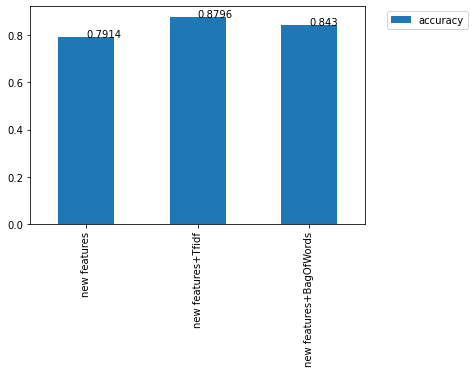

In [5]:
#adding Tfidf to the dataset and adjust it to X_train and X_test
X_train_TfidfVectorizer = X_train_withDec.copy()
X_test_TfidfVectorizer = X_test_withDec.copy()
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result_X_train = tfidf.fit_transform(X_train_TfidfVectorizer["Description"])
tfidf_result_X_test = tfidf.transform(X_test_TfidfVectorizer["Description"])
tfidf_df = pd.DataFrame(tfidf_result_X_train.toarray(), columns = tfidf.get_feature_names())
tfidf_df.columns = ["Tfidf_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = X_train.index
X_train_reviews_data_TfidfVectorizer = pd.concat([X_train_TfidfVectorizer, tfidf_df], axis=1)
tfidf_df2 = pd.DataFrame(tfidf_result_X_test.toarray(), columns = tfidf.get_feature_names())
tfidf_df2.columns = ["Tfidf_" + str(x) for x in tfidf_df2.columns]
tfidf_df2.index = X_test.index
X_test_reviews_data_TfidfVectorizer = pd.concat([X_test_TfidfVectorizer, tfidf_df2], axis=1)
print("Displays X_train after adding tfidf:")
display(X_train_reviews_data_TfidfVectorizer)
print()

X_train_reviews_data_TfidfVectorizer = X_train_reviews_data_TfidfVectorizer.drop('Description',1)
X_test_reviews_data_TfidfVectorizer = X_test_reviews_data_TfidfVectorizer.drop('Description',1)
rf = SGDClassifier()
rf.fit(X_train_reviews_data_TfidfVectorizer, y_train)
pred = rf.predict(X_test_reviews_data_TfidfVectorizer)
score = metrics.accuracy_score(y_test, pred)
accruracy.append(score)
print(f"The accuracy of the model with tfidf is {score}")
print()


#adding bag of word to the dataset and adjust it to X_train and X_test
X_train_bagofword = X_train_withDec.copy()
X_test_bagofword = X_test_withDec.copy()

CountVectorizer = CountVectorizer(min_df = 10)
bagofword_result_X_train = CountVectorizer.fit_transform(X_train_bagofword["Description"]).toarray()
bagofword_result_X_test = CountVectorizer.transform(X_test_bagofword["Description"]).toarray()

CountVectorizer_df = pd.DataFrame(bagofword_result_X_train, columns = CountVectorizer.get_feature_names())
CountVectorizer_df.columns = ["bagofword_"+str(x) for x in CountVectorizer_df.columns]
CountVectorizer_df.index = X_train.index
X_train_reviews_data_CountVectorizer = pd.concat([X_train_bagofword, CountVectorizer_df], axis=1)

CountVectorizer_df2 = pd.DataFrame(bagofword_result_X_test, columns = CountVectorizer.get_feature_names())
CountVectorizer_df2.columns = ["bagofword_" + str(x) for x in CountVectorizer_df2.columns]
CountVectorizer_df2.index = X_test.index
X_test_reviews_data_CountVectorizer = pd.concat([X_test_bagofword, CountVectorizer_df2], axis=1)
print("Displays X_train after adding bag of word:")
display(X_train_reviews_data_CountVectorizer)
print()
X_train_reviews_data_CountVectorizer =X_train_reviews_data_CountVectorizer.drop('Description',1)
X_test_reviews_data_CountVectorizer =X_test_reviews_data_CountVectorizer.drop('Description',1)
rf = SGDClassifier()
rf.fit(X_train_reviews_data_CountVectorizer, y_train)
pred = rf.predict(X_test_reviews_data_CountVectorizer)
score = metrics.accuracy_score(y_test, pred)
accruracy.append(score)
print(f"The accuracy of the model with bag of word is {score}")
print()

#displays the accuracy difference 
df_scores = pd.DataFrame(np.c_[accruracy], index=Attempts_to_predict)
acc = 'accuracy'
ax=df_scores.plot.bar()
ax.legend(labels=[acc] ,bbox_to_anchor=(1.05, 1), loc='upper left')
for index, value in enumerate(accruracy):
    plt.text(index,value, str(value))
plt.show()

<h4 style="align: left; float: left;">find feature importance</h4>

The 20 most important features of the model


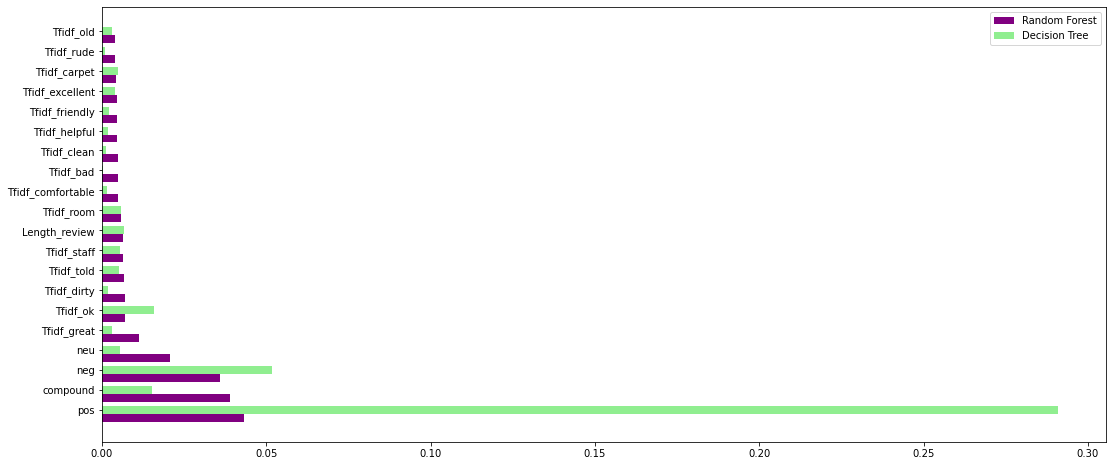

display X train after reducing the features


,pos,compound,neg,neu,Tfidf_great,Tfidf_ok,Tfidf_dirty,Tfidf_told,Tfidf_staff,Length_review,Tfidf_room,Tfidf_comfortable,Tfidf_bad,Tfidf_clean,Tfidf_helpful,Tfidf_friendly,Tfidf_excellent,Tfidf_carpet,Tfidf_rude,Tfidf_old
16152,0.158,0.9524,0.032,0.811,0.000000,0.0,0.0,0.0,0.029586,0.137577,0.103690,0.042588,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
17768,0.257,0.8605,0.163,0.580,0.000000,0.0,0.0,0.0,0.045147,0.068789,0.031645,0.000000,0.0,0.000000,0.068195,0.062543,0.000000,0.0,0.0,0.0
19492,0.269,0.9531,0.035,0.695,0.000000,0.0,0.0,0.0,0.053970,0.067762,0.113491,0.077689,0.0,0.064503,0.081523,0.074767,0.000000,0.0,0.0,0.0
15797,0.302,0.9723,0.051,0.647,0.158396,0.0,0.0,0.0,0.000000,0.068789,0.102669,0.070281,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
6666,0.400,0.9776,0.000,0.600,0.198559,0.0,0.0,0.0,0.061204,0.048255,0.042901,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.628,0.9798,0.000,0.372,0.120396,0.0,0.0,0.0,0.111333,0.024641,0.078038,0.160261,0.0,0.133061,0.168170,0.154233,0.000000,0.0,0.0,0.0
19648,0.459,0.8173,0.000,0.541,0.000000,0.0,0.0,0.0,0.000000,0.013347,0.000000,0.000000,0.0,0.159733,0.000000,0.000000,0.238378,0.0,0.0,0.0
9845,0.169,0.9524,0.094,0.737,0.028337,0.0,0.0,0.0,0.026204,0.182752,0.036735,0.000000,0.0,0.000000,0.000000,0.036301,0.046737,0.0,0.0,0.0
10799,0.561,0.9393,0.000,0.439,0.000000,0.0,0.0,0.0,0.127155,0.019507,0.089129,0.000000,0.0,0.151970,0.192069,0.000000,0.000000,0.0,0.0,0.0


display X test after reducing the features


,pos,compound,neg,neu,Tfidf_great,Tfidf_ok,Tfidf_dirty,Tfidf_told,Tfidf_staff,Length_review,Tfidf_room,Tfidf_comfortable,Tfidf_bad,Tfidf_clean,Tfidf_helpful,Tfidf_friendly,Tfidf_excellent,Tfidf_carpet,Tfidf_rude,Tfidf_old
19134,0.152,0.5994,0.065,0.783,0.072789,0.000000,0.000000,0.0,0.000000,0.039014,0.094362,0.000000,0.0,0.080446,0.000000,0.000000,0.0,0.000000,0.0,0.0
4981,0.115,-0.8625,0.264,0.621,0.000000,0.104874,0.000000,0.0,0.000000,0.050308,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
16643,0.236,0.9168,0.000,0.764,0.000000,0.000000,0.000000,0.0,0.050719,0.051335,0.000000,0.000000,0.0,0.000000,0.076611,0.000000,0.0,0.000000,0.0,0.0
19117,0.297,0.9576,0.056,0.647,0.000000,0.000000,0.000000,0.0,0.000000,0.069815,0.068109,0.069935,0.0,0.116130,0.000000,0.000000,0.0,0.000000,0.0,0.0
5306,0.306,0.9790,0.029,0.665,0.000000,0.000000,0.000000,0.0,0.042504,0.086242,0.089379,0.000000,0.0,0.050799,0.064203,0.058882,0.0,0.106119,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0.304,0.9509,0.032,0.664,0.000000,0.000000,0.000000,0.0,0.000000,0.056468,0.082027,0.084226,0.0,0.069931,0.000000,0.081058,0.0,0.000000,0.0,0.0
1914,0.191,0.8920,0.074,0.734,0.045158,0.000000,0.000000,0.0,0.083517,0.085216,0.058541,0.000000,0.0,0.000000,0.000000,0.057849,0.0,0.000000,0.0,0.0
13584,0.350,0.9726,0.000,0.650,0.132871,0.000000,0.000000,0.0,0.000000,0.051335,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
5594,0.446,0.9947,0.000,0.554,0.000000,0.000000,0.000000,0.0,0.038994,0.091376,0.054666,0.056131,0.0,0.093209,0.176704,0.000000,0.0,0.000000,0.0,0.0


In [9]:
#using DecisionTreeRegressor & RandomForestClassifier to find feature importance

# fit the model 
rfc = RandomForestClassifier()
rfc.fit(X_train_reviews_data_TfidfVectorizer, y_train)

# fit the model 
dt = DecisionTreeClassifier()
dt.fit(X_train_reviews_data_TfidfVectorizer, y_train)

#get importance
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_,'dt':dt.feature_importances_,"feature": X_train_reviews_data_TfidfVectorizer.columns})
feature_importance.sort_values(by='rfc',ascending=False,inplace=True)
feature_importance = feature_importance.head(20)
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance["feature"])
ax.legend()
print("The 20 most important features of the model")
plt.show()

# fit the feature importance to X_train and X_test
feature_list = [''+c+'' for c in feature_importance['feature']]
X_train = X_train_reviews_data_TfidfVectorizer[feature_list]
X_test = X_test_reviews_data_TfidfVectorizer[feature_list]
print("display X train after reducing the features")
display(X_train)
print("display X test after reducing the features")
display(X_test)

<h3 style="align: left; float: left;">Modeling</h3>

In [10]:
#SVM model
SVM_model = SGDClassifier()
SVM_model.fit(X_train, y_train)
SVM_pred = SVM_model.predict(X_test)
SVM_score = metrics.accuracy_score(y_test, SVM_pred)

#Decision Tree model
DecisionTree_model = SGDClassifier()
DecisionTree_model.fit(X_train, y_train)
DecisionTree_pred = DecisionTree_model.predict(X_test)
DecisionTree_score = metrics.accuracy_score(y_test, DecisionTree_pred)

#NB model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_pred = NB_model.predict(X_test)
NB_score = metrics.accuracy_score(y_test, NB_pred)

<h3 style="align: left; float: left;">Evaluation</h3>

In [11]:
# Print the relevant indices
print(f"Accuracy for SVM model is : {SVM_score}")
print(f"precision for SVM model is :{precision_score(y_test, SVM_pred, average='macro')}")
print(f"recall for SVM model is :{recall_score(y_test, SVM_pred, average='macro')}")
print(f"f1 for SVM model is :{f1_score(y_test, SVM_pred, average='macro')}")
print()

print(f"Accuracy for Decision Tree model is : {DecisionTree_score}")
print(f"precision for Decision Tree model is : {precision_score(y_test, DecisionTree_pred, average='macro')}")
print(f"recall for Decision Tree model is :{recall_score(y_test, DecisionTree_pred, average='macro')}")
print(f"f1 for Decision Tree model is :{f1_score(y_test, DecisionTree_pred, average='macro')}")
print()
print(f"Accuracy for NB model is : {NB_score}")
print(f"precision for NB model is : {precision_score(y_test, NB_pred, average='macro')}")
print(f"recall for NB model is :{recall_score(y_test, NB_pred, average='macro')}")
print(f"f1 for NB model is :{f1_score(y_test, NB_pred, average='macro')}")


Accuracy for SVM model is : 0.8222
precision for SVM model is :0.80842003447569
recall for SVM model is :0.7608428879905909
f1 for SVM model is :0.7773043302909948

Accuracy for Decision Tree model is : 0.8118
precision for Decision Tree model is : 0.8182314602783161
recall for Decision Tree model is :0.7270799954414733
f1 for Decision Tree model is :0.7495335494886306

Accuracy for NB model is : 0.7982
precision for NB model is : 0.7720449453739958
recall for NB model is :0.7388494859367214
f1 for NB model is :0.7509954137254389
